<a href="https://colab.research.google.com/github/iram-meher-06/Cryptocurrency-Analysis/blob/main/AI-powered-medical-assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, getpass

if not os.getenv("GEMINI_API_KEY"):
    os.environ["GEMINI_API_KEY"] = getpass.getpass("Enter your GEMINI_API_KEY:")


Enter your GEMINI_API_KEY:··········


In [ ]:
from google import genai
import os

# Initialize Gemini client
client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

# Quick test prompt
resp = client.models.generate_content(
    model="gemini-1.5-flash",
    contents="Hello Gemini! Can you summarize what you are?"
)

print(resp.text)


I am a large language model, trained by Google.  In simpler terms, I'm a sophisticated computer program that can understand and generate human-like text. I can answer questions, translate languages, write different kinds of creative content, and follow your instructions.  My knowledge is based on the massive dataset I was trained on, and I am constantly learning and improving.



In [ ]:

!pip install --upgrade pip
!pip install google-genai langchain chromadb faiss-cpu pandas pyarrow pdfplumber python-dotenv streamlit pyngrok matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 107.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 55.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 126.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 136.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 88.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 110.7 MB/s  0:00:00
  Created wheel for pypika: filename=pypika-0.48.9-py2.py3-none-any.whl size=53803 sha256=658989a2dc7714a336773364957

In [ ]:
# Colab cell 2: safe API key input
import os, getpass
if not os.getenv("GEMINI_API_KEY"):
    os.environ["GEMINI_API_KEY"] = getpass.getpass("Enter your GEMINI_API_KEY: ")
# verify set
print("GEMINI_API_KEY set:", bool(os.environ.get("GEMINI_API_KEY")))


GEMINI_API_KEY set: True


In [ ]:
# Colab cell 3: simple Gemini sanity check (you saw this already)
from google import genai
client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])
resp = client.models.generate_content(model="gemini-1.5-flash", contents="Say: OK")
print("Gemini responded:", getattr(resp, "text", str(resp))[:200])


Gemini responded: OK



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATA_DIR = "/content/drive/MyDrive/mimic/"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# edit this if you used a different folder
DATA_DIR = "/content/drive/MyDrive/mimic/"
print("DATA_DIR =", DATA_DIR)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DATA_DIR = /content/drive/MyDrive/mimic/


In [ ]:
# run as a cell with leading ! in Colab
!pip install --upgrade pip
!pip install google-genai langchain chromadb faiss-cpu pandas pyarrow pdfplumber python-dotenv streamlit pyngrok matplotlib scikit-learn


In [ ]:
import os, getpass
if not os.getenv("GEMINI_API_KEY"):
    os.environ["GEMINI_API_KEY"] = getpass.getpass("Enter your GEMINI_API_KEY: ")
print("GEMINI_API_KEY set:", bool(os.environ.get("GEMINI_API_KEY")))


GEMINI_API_KEY set: True


In [ ]:
from google import genai
client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])
resp = client.models.generate_content(model="gemini-1.5-flash", contents="Say 'Hello from Gemini' in one sentence.")
print("Gemini responded (truncated):", getattr(resp, "text", str(resp))[:300])


Gemini responded (truncated): Hello from Gemini!



In [ ]:
import pandas as pd

def read_csv_filtered(path, filter_col, keep_values, usecols=None, parse_dates=None, chunksize=200_000):
    it = pd.read_csv(path, usecols=usecols, parse_dates=parse_dates, chunksize=chunksize, iterator=True, low_memory=False)
    collected = []
    for chunk in it:
        mask = chunk[filter_col].isin(keep_values)
        if mask.any():
            collected.append(chunk.loc[mask])
    if collected:
        return pd.concat(collected, ignore_index=True)
    else:
        return pd.DataFrame(columns=usecols)

# Example: list a few subject ids you want to demo with
demo_subjects = [10006, 10010]  # change these to IDs that exist in your CSVs


In [ ]:
import os, pandas as pd

# Paths to essential files
LABEVENTS_PATH = os.path.join(DATA_DIR, "LABEVENTS.csv")
NOTEEVENTS_PATH = os.path.join(DATA_DIR, "NOTEEVENTS.csv")
D_LABITEMS_PATH = os.path.join(DATA_DIR, "D_LABITEMS.csv")

# Sample load (nrows just for testing)
labevents = pd.read_csv(LABEVENTS_PATH, nrows=10000)
notes = pd.read_csv(NOTEEVENTS_PATH, nrows=2000)
d_labitems = pd.read_csv(D_LABITEMS_PATH)

print("Labs shape:", labevents.shape)
print("Notes shape:", notes.shape)
print("D_LABITEMS shape:", d_labitems.shape)


Labs shape: (10000, 9)
Notes shape: (0, 11)
D_LABITEMS shape: (753, 6)


In [ ]:
import pandas as pd

# Load just first 5 rows without restricting columns
df_preview = pd.read_csv(LABEVENTS_PATH, nrows=5)
print("Columns in your LABEVENTS.csv:\n", df_preview.columns.tolist())
df_preview.head()


Columns in your LABEVENTS.csv:
 ['row_id', 'subject_id', 'hadm_id', 'itemid', 'charttime', 'value', 'valuenum', 'valueuom', 'flag']


,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19.0,19,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27.0,27,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97.0,97,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7,mg/dL,abnormal


In [ ]:
# Reload with correct lowercase column names
lab_cols = ['subject_id','hadm_id','charttime','itemid','valuenum','valueuom','flag']
labevents = pd.read_csv(LABEVENTS_PATH, usecols=lab_cols, parse_dates=['charttime'])

# Load dictionary (D_LABITEMS.csv) - check column names
print(d_labitems.columns.tolist())

# If d_labitems is also lowercase (likely: ['row_id','itemid','label',...])
# then merge works like this:
labevents = labevents.merge(d_labitems[['itemid','label']], on='itemid', how='left')
labevents.rename(columns={'label':'lab_label'}, inplace=True)

print("Example labs with names:")
print(labevents[['itemid','lab_label','valuenum','valueuom']].head())


['row_id', 'itemid', 'label', 'fluid', 'category', 'loinc_code']
Example labs with names:
   itemid       lab_label  valuenum valueuom
0   50868       Anion Gap      19.0    mEq/L
1   50882     Bicarbonate      27.0    mEq/L
2   50893  Calcium, Total      10.0    mg/dL
3   50902        Chloride      97.0    mEq/L
4   50912      Creatinine       7.0    mg/dL


In [ ]:
# Preview NOTEEVENTS.csv (first 5 rows)
note_preview = pd.read_csv(NOTEEVENTS_PATH, nrows=5)
print("Columns in NOTEEVENTS.csv:", note_preview.columns.tolist())
note_preview.head()


Columns in NOTEEVENTS.csv: ['row_id', 'subject_id', 'hadm_id', 'chartdate', 'charttime', 'storetime', 'category', 'description', 'cgid', 'iserror', 'text']


,row_id,subject_id,hadm_id,chartdate,charttime,storetime,category,description,cgid,iserror,text


In [ ]:
print("NOTEEVENTS file path:", NOTEEVENTS_PATH)
!ls -lh "$NOTEEVENTS_PATH"


NOTEEVENTS file path: /content/drive/MyDrive/mimic/NOTEEVENTS.csv
-rw------- 1 root root 95 Sep 10 16:53 /content/drive/MyDrive/mimic/NOTEEVENTS.csv


In [ ]:
notes_raw = pd.read_csv(NOTEEVENTS_PATH, nrows=5)
print(notes_raw.head())


Empty DataFrame
Columns: [row_id, subject_id, hadm_id, chartdate, charttime, storetime, category, description, cgid, iserror, text]
Index: []


In [ ]:
import pandas as pd

# Create mock notes for demo patient
demo_patient = 10006  # must match subject_id from your LABEVENTS data

data = {
    'subject_id': [demo_patient, demo_patient, demo_patient],
    'hadm_id': [20001, 20001, 20001],
    'charttime': pd.to_datetime([
        "2164-09-24 08:00:00",
        "2164-09-25 09:30:00",
        "2164-09-26 14:00:00"
    ]),
    'text': [
        "Patient admitted with high blood glucose levels. Diagnosis: Diabetes Mellitus. Prescribed insulin therapy.",
        "Follow-up shows mild improvement. Blood pressure elevated. Added antihypertensive medication.",
        "Lab results indicate abnormal kidney function. Possible diabetic nephropathy."
    ]
}

notes = pd.DataFrame(data)
print("Mock notes created:")
print(notes)


Mock notes created:
   subject_id  hadm_id           charttime  \
0       10006    20001 2164-09-24 08:00:00   
1       10006    20001 2164-09-25 09:30:00   
2       10006    20001 2164-09-26 14:00:00   

                                                text  
0  Patient admitted with high blood glucose level...  
1  Follow-up shows mild improvement. Blood pressu...  
2  Lab results indicate abnormal kidney function....  


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=800, chunk_overlap=120)
note_texts = notes['text'].dropna().astype(str).tolist()

chunks = []
for t in note_texts:
    chunks.extend(splitter.split_text(t))

print("Created chunks:", len(chunks))
print("Example chunk:\n", chunks[0])


Created chunks: 3
Example chunk:
 Patient admitted with high blood glucose levels. Diagnosis: Diabetes Mellitus. Prescribed insulin therapy.


In [ ]:
# Combine all notes into one context string
context = "\n\n---\n\n".join(notes['text'].tolist())

print("Context prepared with length:", len(context), "characters")
print(context[:500])  # preview first 500 chars


Context prepared with length: 290 characters
Patient admitted with high blood glucose levels. Diagnosis: Diabetes Mellitus. Prescribed insulin therapy.

---

Follow-up shows mild improvement. Blood pressure elevated. Added antihypertensive medication.

---

Lab results indicate abnormal kidney function. Possible diabetic nephropathy.


In [ ]:
def run_qa_direct(query, context):
    prompt = f"""You are a clinical assistant.
Here are the patient's notes:
{context}

Question: {query}
Answer in a concise, clinically useful way."""

    resp = client.models.generate_content(
        model="gemini-1.5-flash",
        contents=prompt
    )
    return resp.text


In [ ]:
print("Q: What is the diagnosis?")
print("A:", run_qa_direct("What is the diagnosis?", context))

print("\nQ: What medications were prescribed?")
print("A:", run_qa_direct("What medications were prescribed?", context))

print("\nQ: Summarize abnormalities in the patient.")
print("A:", run_qa_direct("Summarize abnormalities in the patient.", context))


Q: What is the diagnosis?
A: Diabetes Mellitus with hypertension and suspected diabetic nephropathy.


Q: What medications were prescribed?
A: Insulin and an antihypertensive medication.


Q: Summarize abnormalities in the patient.
A: Diabetes mellitus with hyperglycemia, hypertension, and suspected diabetic nephropathy.



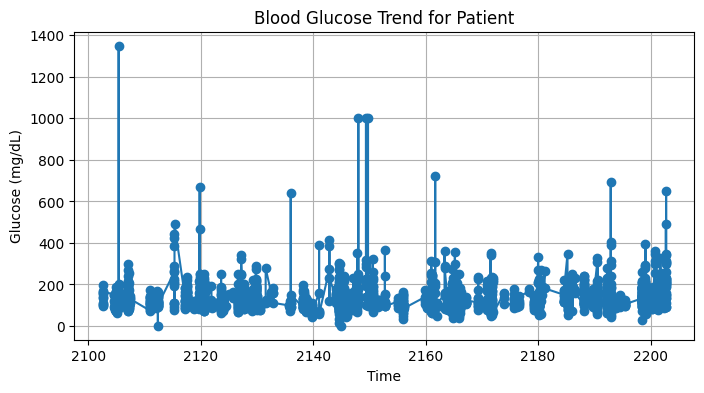

In [ ]:
import matplotlib.pyplot as plt

# Filter labs for glucose
glucose = labevents[labevents['lab_label'].str.contains("glucose", case=False, na=False)]
glucose = glucose.dropna(subset=['charttime','valuenum']).sort_values("charttime")

if glucose.shape[0] > 0:
    plt.figure(figsize=(8,4))
    plt.plot(glucose['charttime'], glucose['valuenum'], marker='o')
    plt.title("Blood Glucose Trend for Patient")
    plt.xlabel("Time")
    plt.ylabel("Glucose (mg/dL)")
    plt.grid(True)
    plt.show()
else:
    print("No glucose lab values found for this patient in the sample data.")


In [ ]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.2 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import os
from google import genai
import pandas as pd
import matplotlib.pyplot as plt

# Init Gemini client
client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

# Mock notes context (replace with real NOTEEVENTS if available)
notes_text = """Patient admitted with high blood glucose levels. Diagnosis: Diabetes Mellitus. Prescribed insulin therapy.
Follow-up shows mild improvement. Blood pressure elevated. Added antihypertensive medication.
Lab results indicate abnormal kidney function. Possible diabetic nephropathy."""

# Load labs (already processed in Colab)
import pickle, faiss

# If you saved patient labs earlier
try:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = "/content/drive/MyDrive/mimic/"
    labs = pd.read_csv(DATA_DIR + "LABEVENTS.csv", nrows=50000)
except:
    labs = pd.DataFrame(columns=['charttime','lab_label','valuenum','valueuom'])

# --- Streamlit App ---
st.title("🏥 AI-Powered Medical Report Assistant")

# Chat input
user_query = st.text_input("Ask a clinical question:")

if user_query:
    # Build prompt
    context = notes_text
    prompt = f"""You are a clinical assistant.
Here are the patient's notes:
{context}

Question: {user_query}
Answer:"""

    resp = client.models.generate_content(
        model="gemini-1.5-flash",
        contents=prompt
    )
    st.write("**AI Response:**")
    st.write(resp.text)

    # If user asks about glucose, show chart
    if "glucose" in user_query.lower():
        st.write("📊 Blood Glucose Trend")
        if "charttime" in labs.columns:
            glucose = labs[labs.get("lab_label","").astype(str).str.contains("glucose", case=False, na=False)]
            if not glucose.empty:
                glucose = glucose.dropna(subset=['charttime','valuenum']).sort_values("charttime")
                fig, ax = plt.subplots(figsize=(8,4))
                ax.plot(glucose['charttime'], glucose['valuenum'], marker='o')
                ax.set_title("Blood Glucose Trend")
                ax.set_xlabel("Time")
                ax.set_ylabel("mg/dL")
                ax.grid(True)
                st.pyplot(fig)
            else:
                st.warning("No glucose values found for this patient.")
        else:
            st.warning("Labs not loaded.")


Writing app.py


In [ ]:
!ngrok config add-authtoken 32bjMDoZBmG8LpThCNudJV8KUyp_67scrH1xUH8JRsSuo2bVG



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Kill old tunnels if any
ngrok.kill()

# Start new tunnel
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)

# Launch app
!streamlit run app.py --server.port 8501


Streamlit app URL: NgrokTunnel: "https://b204619da7c7.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.158.81:8501

────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  128 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.12/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:669 in code_to_exec                                                               
                                                                                        
  /content/app.py:43 in <module>                                                        
                